In [84]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, pi
from scipy.integrate import odeint

# 1e

In [85]:
#ode functions
def derivs(k, time, params):
    x, y, vx, vy = k
    GM = params
    R = ((x**2) + (y**2))**0.5
    dvx_dt = GM/(R**3)*x
    dvy_dt = GM/(R**3)*y
    dx_dt = (2.0*GM*x/(R**2))**(0.5)
    dy_dt = (2.0*GM*y/(R**2))**(0.5)
    d_vect = [dvx_dt, dvy_dt, dx_dt, dy_dt]
    return d_vect

free fall 

In [86]:
x0 = 1.0
y0 = 0
vx0 = 0
init_cond = (x0, y0, vx0, 0) #x,y,vx,vy
GM = 1.0
params = GM
time_space = np.linspace(0, 2*np.pi, 1000)
sol_ff = odeint(derivs, init_cond, time_space, args=(params,))

circular orbit

In [87]:
R0 = ((x0**2) + (y0**2))**0.5
vcir = (GM/R0)**0.5
Tcir = 2.0*np.pi*R0*((R0/GM)**(0.5))
init_cond = (1, 0, 0, vcir) #x,y,vx,vy
time_space = np.linspace(0, 4.0*Tcir, 1000)
sol_cir = odeint(derivs, init_cond, time_space, args=(params,))

pericenter

In [88]:
e = 0.2
#R = a * (1 - e)
params = GM
vperi = (9.0*GM/(5.0*R0))**0.5
Tperi = 1.23 * R0 * ((R0/GM)**0.5)
init_cond = (1, 0, 0, vperi) #x,y,vx,vy
time_space = np.linspace(0, 4.0*Tperi, 1000)
sol_per = odeint(derivs, init_cond, time_space, args=(params,))

apocenter

In [89]:
e = 0.2
#R = a * (1 + e)
params = GM
vapo = (4.0*GM/(5.0*R0))**0.5
Tapo = 1.85 * R0 * ((R0/GM)**0.5)
init_cond = (1, 0, 0, vapo) #x,y,vx,vy
time_space = np.linspace(0, 4.0*Tapo, 1000)
sol_apo = odeint(derivs, init_cond, time_space, args=(params,))

escape

In [90]:
#R = 2.0 * a
params = GM
vesc = (2.0*GM/R0)**0.5
Tesc = R0 * ((R0/(2.0*GM))**0.5)
init_cond = (1, 0, 0, vesc) #x,y,vx,vy
time_space = np.linspace(0, 4.0*Tesc, 1000)
sol_esc = odeint(derivs, init_cond, time_space, args=(params,))

twice escape

In [91]:
#R = 2.0 * a
params = GM
v2esc = (2.0*GM/R0)**0.5
T2esc = 0.5 * R0 * ((R0/(2.0*GM))**0.5)
init_cond = (1, 0, 0, v2esc) #x,y,vx,vy
time_space = np.linspace(0, 4.0*T2esc, 1000)
sol_2esc = odeint(derivs, init_cond, time_space, args=(params,))

Plot all curves

<IPython.core.display.Javascript object>


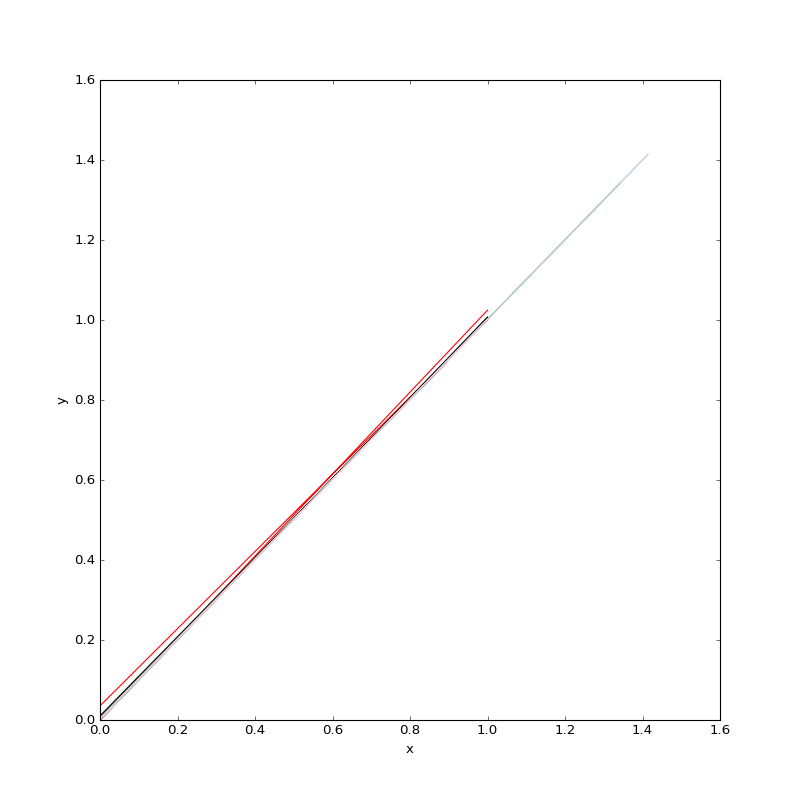

In [98]:
plt.figure(figsize=(10,10))
plt.plot(sol_ff[0],sol_ff[1], color = 'blue')
plt.plot(sol_cir[0], sol_cir[1], color = 'red')
plt.plot(sol_per[0], sol_per[1], color = 'green')
plt.plot(sol_apo[0], sol_apo[1], color = 'black')
plt.plot(sol_esc[0], sol_esc[1], color = 'cyan')
plt.plot(sol_2esc[0], sol_esc[1], color = 'pink')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 2

In [110]:
import time
from matplotlib.patches import Ellipse

In [111]:
M_space = np.linspace(0, 2*pi, 1000)
a = 0.5
e = 0.2
a2 = 1.0
e2 =0.1
b = a * ((1 - (e**2))**(0.5))
#x_prime = -a*e*cos(M_space)
#y_prime = 2*a*e*sin(M_space)

<IPython.core.display.Javascript object>


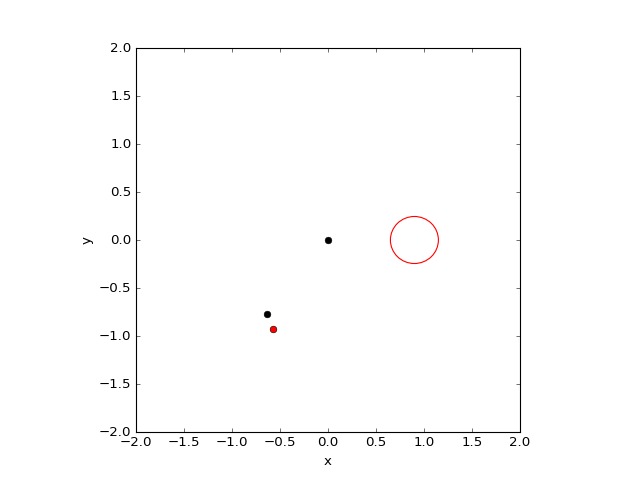

In [ ]:
%matplotlib notebook
fig,ax = plt.subplots(1,1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.plot([0],[0],'ko')
plt.show()
first = True
for M_frame in M_space:
    f_frame = 2*e2*sin(M_frame) + M_frame
    r_frame = (a2*(1+e2**2))/(1+e2*cos(f_frame))
    if first:
        x = np.cos(M_frame) - a*e*np.cos(M_frame)
        y = np.sin(M_frame) + 2*a*e*np.sin(M_frame)
        ell = Ellipse(xy = (x, y), width = a, height = b )
        ax.plot(np.cos(M_frame), np.sin(M_frame), 'ko')
        ax.plot(np.cos(M_frame) -a*e*np.cos(M_frame), np.sin(M_frame) + 2*a*e*np.sin(M_frame), 'ko', color = 'red')
        ax.plot(r_frame*np.cos(f_frame), r_frame*np.sin(f_frame))
        ell.set_facecolor('none')
        ell.set_edgecolor('red')
        ax.add_artist(ell)
        first = False
    else:
#        plt.close(ell)
        x = np.cos(M_frame) - a*e*np.cos(M_frame)
        y = np.sin(M_frame) + 2*a*e*np.sin(M_frame)
#        ell = Ellipse(xy = (x, y), width = a, height = b )
        ax.lines[1].set_xdata(np.cos(M_frame))
        ax.lines[1].set_ydata(np.sin(M_frame))
        ax.lines[2].set_xdata(np.cos(M_frame) - a*e*np.cos(M_frame))
        ax.lines[2].set_ydata(np.sin(M_frame) + 2*a*e*np.sin(M_frame))
#        ax.lines[3].set_xdata(r_frame*np.cos(f_frame))
#        ax.lines[3].set_ydata(r_frame*np.sin(f_frame))
#        ell.set_facecolor('none')
#        ell.set_edgecolor('red')
#        ax.lines[4].set(ell)
    fig.canvas.draw()
    time.sleep(0.1)
